

```
 TRAINING CODE FOR CUSTOM DATASET USING YOLOV* BY ULTRALYTICS ✈
```

> AUTHOR : ROHIT BIRADAR PATIL


> EMAIL : 01fe21bec234@kletech.ac.in

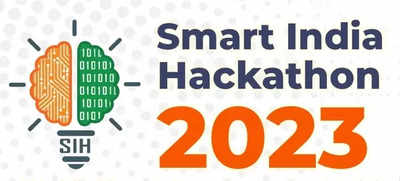

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)







In [ ]:
import os
HOME = os.getcwd()
print(HOME)



# **Installing all the required libraries.**



In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

from ultralytics import YOLO

from IPython.display import display, Image

import ultralytics
ultralytics.checks()

# Downloading the dataset from roboflow.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-universe-projects").project("banana-ripeness-classification")
dataset = project.version(4).download("folder")

## CUSTOM TRAINING ⌛

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train/

## CONFUSION MATRIX

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# PERFORMANCE EVALUATION

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# VALIDATING THE CUSTOM TRAIN MODEL

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

# PREDICTING THE RESULTS

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

# DISPLAY SOME RESULTS

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# DEPLOAY MODEL

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")